In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.getenv('HW_FUZZING') + "/scripts")
from config import Config

In [2]:
# Import experiment configuration
HW_FUZZING_DIR = os.getenv("HW_FUZZING")
CORE_DIR = HW_FUZZING_DIR + "/circuits/double_counter/"
CONFIG_FILE = CORE_DIR + "configs/exp001_test_run_exp.config.json"
config = Config(CONFIG_FILE)

-------------------------------------------------------------------
Loading experiment configurations ...
-------------------------------------------------------------------


In [3]:
# Load VCD data
VCD_DATA_FILENAME = "%s%s/%s/%s_1/vcd/data.json" % \
    (CORE_DIR, \
    config.exp_data_path, \
    config.fuzzer_output_dir,
    config.fuzzer_instance_basename)
vcd_df = pd.read_json(VCD_DATA_FILENAME)

In [5]:
# Load Log Data
LOG_FILENAME = "%s%s/logs/%s_1.err.log" % \
    (CORE_DIR, \
    config.exp_data_path, \
    config.fuzzer_instance_basename)
log_df = pd.read_csv(LOG_FILENAME, header=0, skipinitialspace=True)

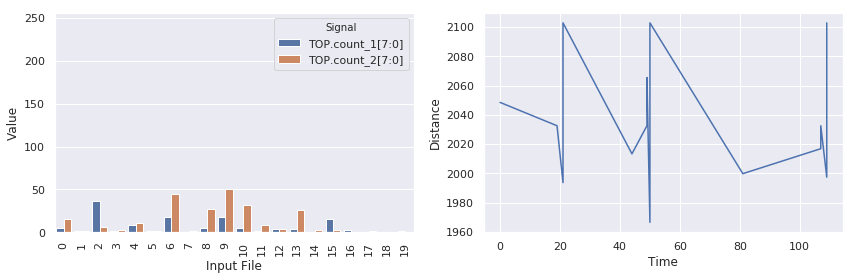

In [7]:
# Plot data
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4));

# Plot Register Counts
sns.barplot(x="Input File", y="Value", hue="Signal", data=vcd_df, ax=ax1)
ax1.set_ylim([0, 256])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

# Plot Distance Convergence
sns.lineplot(x=log_df["Time"], y=log_df["Distance"], ax=ax2, estimator=None)

# Adjust layout of subplots to fit
plt.tight_layout();

In [10]:
# Save Plot as a PDF
plot_filename = "exp%s_%s_%s_%s_1.pdf" % \
  (str(config.experiment_number).zfill(3), \
   config.experiment_name, \
   config.core, \
   config.fuzzer_instance_basename)
print("Saving plot to:", plot_filename)
plt.savefig(plot_filename, format='PDF');

Saving plot to: exp001_test_run_exp_double_counter_aflgo_1ttemins_2mins_1.pdf


<Figure size 600x400 with 0 Axes>

In [ ]:
# Example Input File
# <byte> --> LSB fed to *select* input bit
# <byte>
# <byte>
# <byte>
# <byte>
# <byte>
# .
# .
# .
# <byte>